# Climate Change Belief Analysis

##### Classification_TeamMM1_DSFT21

# Introduction

We live on a planet with finite natural resources, these resources are the basis on which the modern economy is built upon. An outcome of using natural resources to fuel the modern economy, given by scientific evidence is climate change. The scientific evidence is overwhelming but there are still those who deny the existence of climate change.

The split in opinion on the existence of climate change affects businesses. Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. 

EDSA is challenging the team during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

# Table of Contents

1.Importing Libraries

2.Importing Dataset

3.Data Preprocessing

4.Exploratory Data Analysis

5.Feature Engineering and Selection

6.Model Selection

7.Model Evaluation


# Importing Libraries

In [1]:
# Importing modules for data science and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 180
# NLP Libraries
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image
# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [4]:
# Loading in the datasets
train = pd.read_csv("https://raw.githubusercontent.com/EveSithole/MM1_classification_predict/main/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/EveSithole/MM1_classification_predict/main/test_with_no_labels.csv")
#sample_submission = pd.read_csv('sample_submission.csv')

# Data Preprocessing

## Summary Statistics

In [5]:
# Looking at the first few entries in the dataset
train.head()


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [6]:
# Shape of the dataset
train.shape

(15819, 3)

In [7]:
# dataframe information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [8]:
# Looking at the numbers of possible classes in our sentiment
train['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

In [8]:
# Looking at the how the messages are distributed across the sentiment
train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


## Missing values

In [9]:
# Checking for missing values
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

As we can see our dataset has no missing values.

In [10]:
# Checking whether a character is white-space character or not
print(len(train['message']))
print(sum(train['message'].apply(lambda x: x.isspace())))

15819
0


In [9]:
# Sample tweet
tweet = train.iloc[6,1]
print(tweet)

RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R


Text(0.5, 1.0, 'Distribution of target labels')

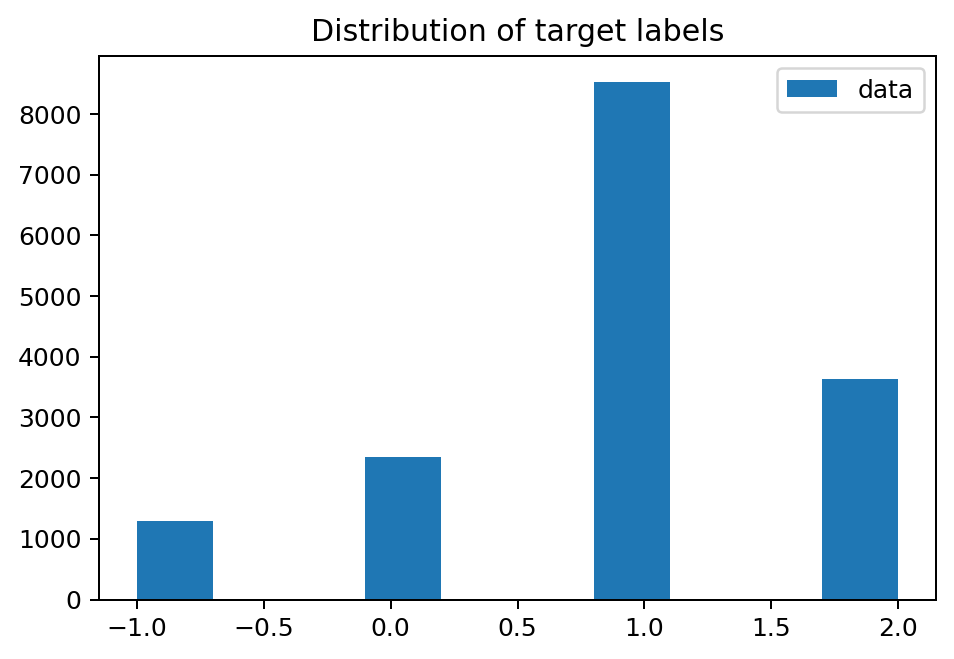

In [12]:
# Visualizing the distribution of the target 
plt.hist(train['sentiment'], label='data');
plt.legend();
plt.title('Distribution of target labels')

Text(0, 0.5, 'Density')

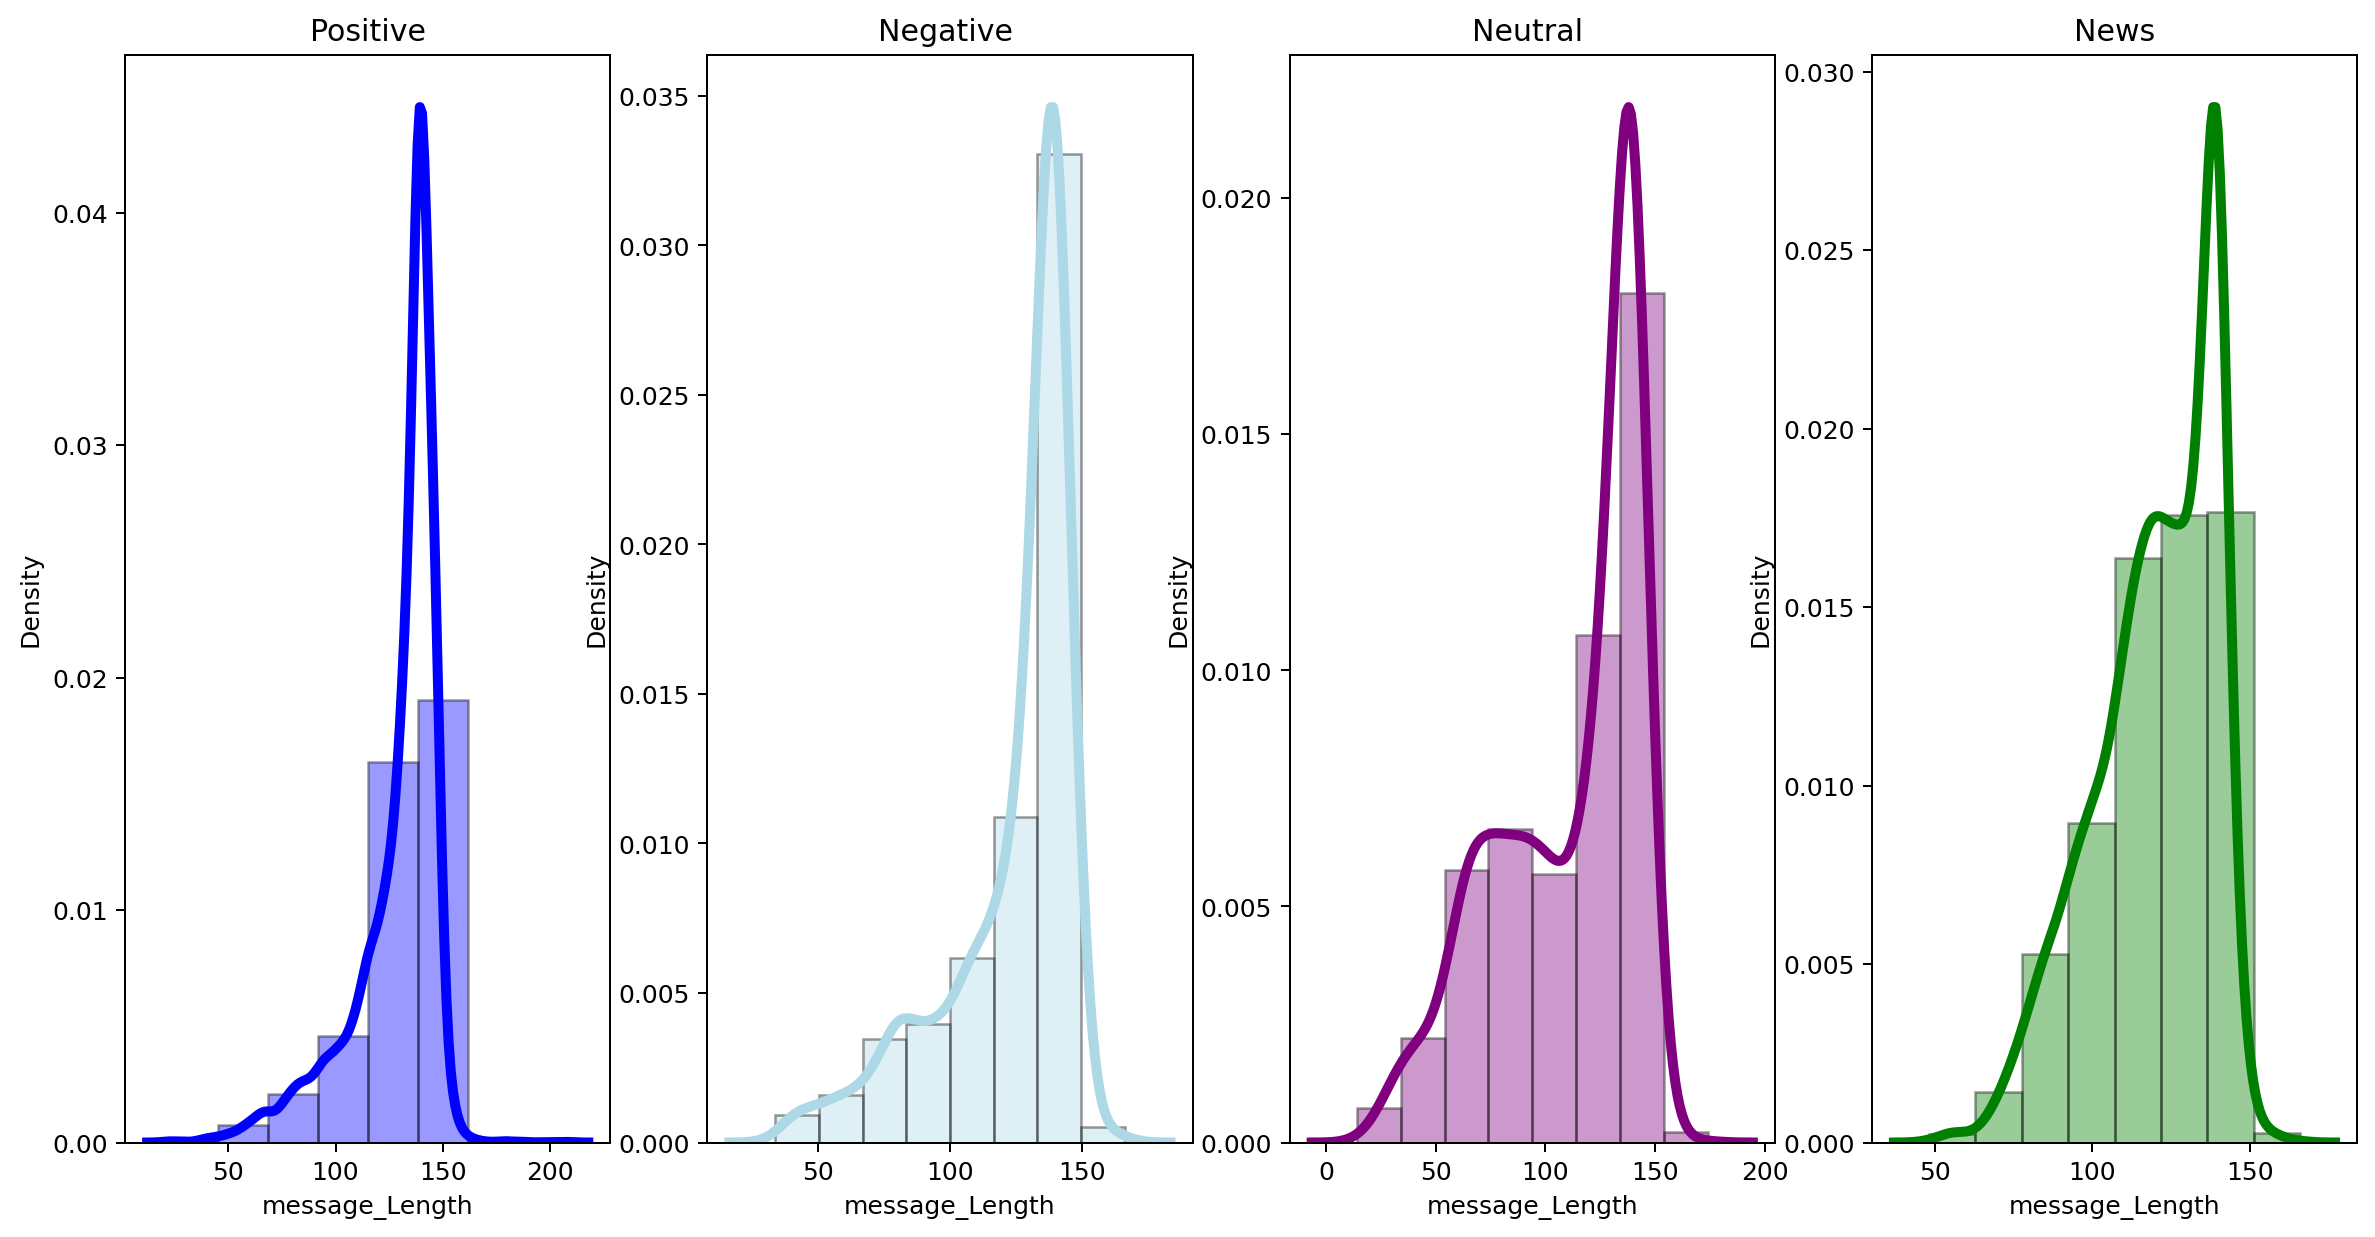

In [13]:
# Distribution plots for the label
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,8))

#For Positive 
sns.distplot(train[train['sentiment']==1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'blue', 
             ax = ax1,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.set_title('Positive')
ax1.set_xlabel('message_Length')
ax1.set_ylabel('Density')

#For Negative 
sns.distplot(train[train['sentiment']==-1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'lightblue', 
             ax = ax2,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax2.set_title('Negative ')
ax2.set_xlabel('message_Length')
ax2.set_ylabel('Density')

#For Neutral 
sns.distplot(train[train['sentiment']==0]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'purple',  
             ax = ax3,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax3.set_title('Neutral ')
ax3.set_xlabel('message_Length')
ax3.set_ylabel('Density')

#For Neews
sns.distplot(train[train['sentiment']==2]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'green', 
             ax = ax4,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax4.set_title('News')
ax4.set_xlabel('message_Length')
ax4.set_ylabel('Density')

# Exploratory Data Analysis

We need to perform investigative and detective analysis on our data to see if we can gain any useful insights. We have data being generated from tweets, it’s important to utilize Exploratory Data Analysis to analyze all this text data, with the aid of Visuals to help organizations make data-driven decisions.

In [14]:
new_df = train.copy()

#Labeling the target
new_df['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in new_df['sentiment']]

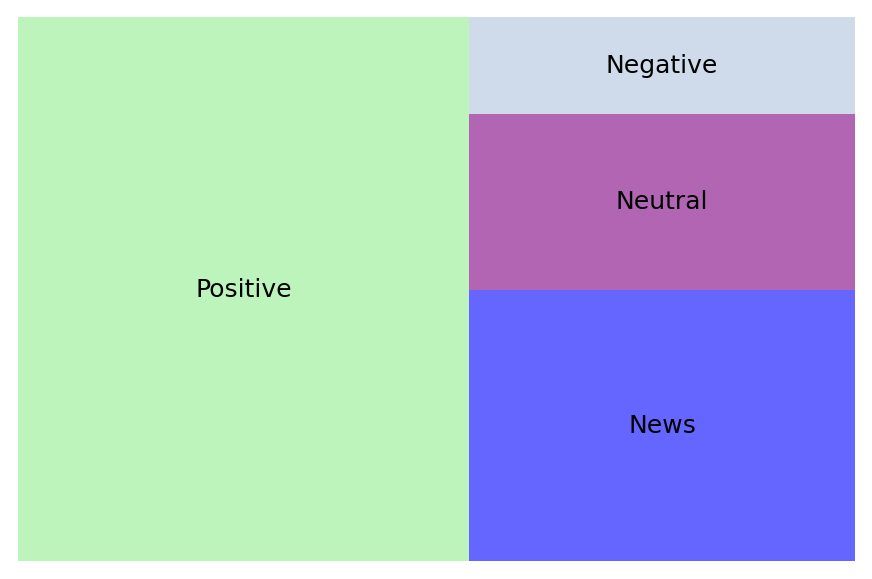

In [16]:
import squarify

# checking the numerical distribution
values = new_df['sentiment'].value_counts()/new_df.shape[0]
labels = (new_df['sentiment'].value_counts()/new_df.shape[0]).index 
colors = ['lightgreen', 'blue', 'purple', 'lightsteelblue']

squarify.plot(sizes=values, label=labels,  color=colors, alpha=0.6)
plt.axis('off')
plt.show()

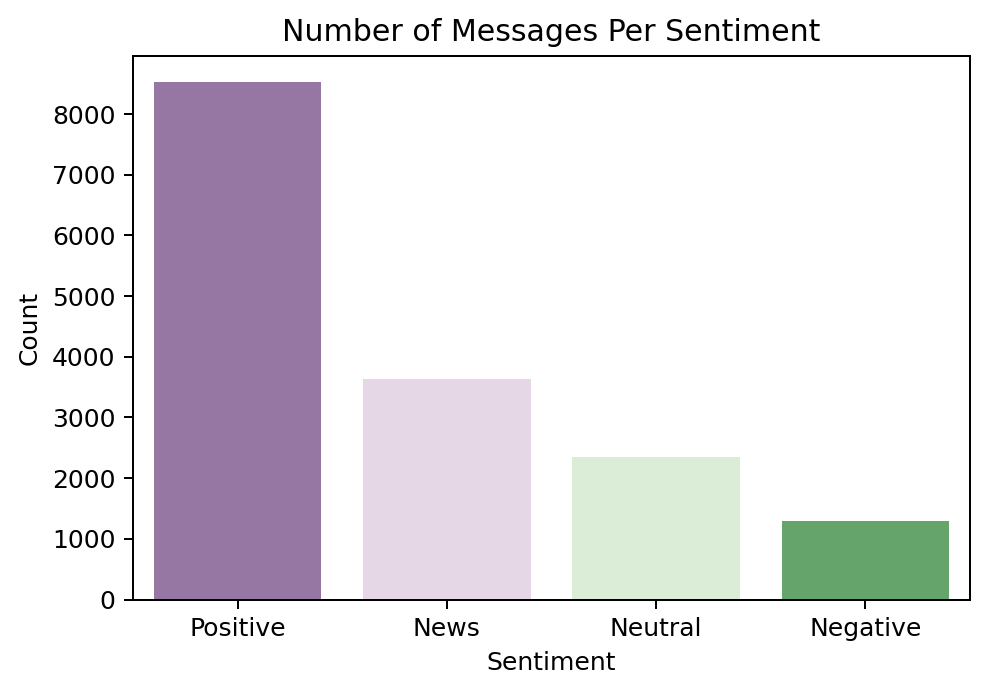

In [17]:
sns.countplot(x='sentiment' ,data = new_df, palette='PRGn')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.title('Number of Messages Per Sentiment')
plt.show()

As we noted earlier that there is an imbalance of classes in the daset, this can lead to a disproportionate ratio of observations in each class, causing problems as most algorithms are designed to maximize accuracy and reduce error. We therefore continue to analyse and evaluate for more insights to be derived from the dataset as we prepared to balance later on in the analysis.

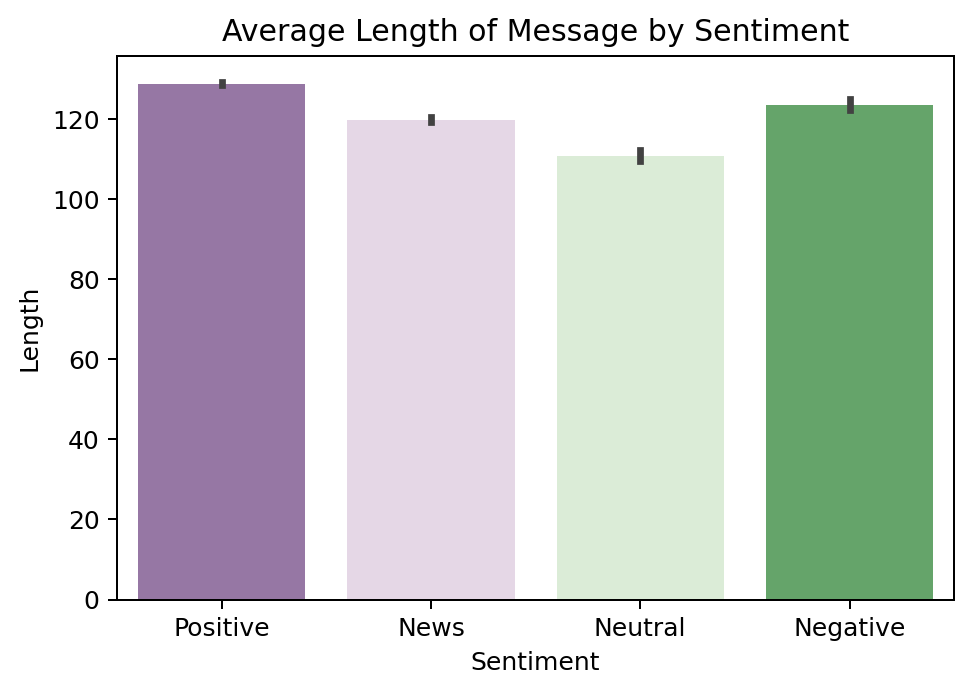

In [19]:
# Visualizing text lengths for each sentiment
sns.barplot(x='sentiment', y=new_df['message'].apply(len) ,data = new_df, palette='PRGn')
plt.ylabel('Length')
plt.xlabel('Sentiment')
plt.title('Average Length of Message by Sentiment')
plt.show()

In [20]:
# Extracting Users in a column
new_df['users'] = [''.join(re.findall(r'@\w{,}', line)) 
                       if '@' in line else np.nan for line in new_df.message]

# Creating a column of hastags
new_df['hashtags'] = [' '.join(re.findall(r'#\w{,}', line)) 
                       if '#' in line else np.nan for line in new_df.message]

In [22]:
# Generating Counts of users
counts = new_df[['message', 'users']].groupby('users', as_index=False).count().sort_values(by='message', ascending=False)

In [23]:
# Top 5 most popular
counts.head()

,users,message
3410,@StephenSchlegel,307
3270,@SenSanders,243
6182,@realDonaldTrump,143
448,@BernieSanders,121
612,@CNN,106


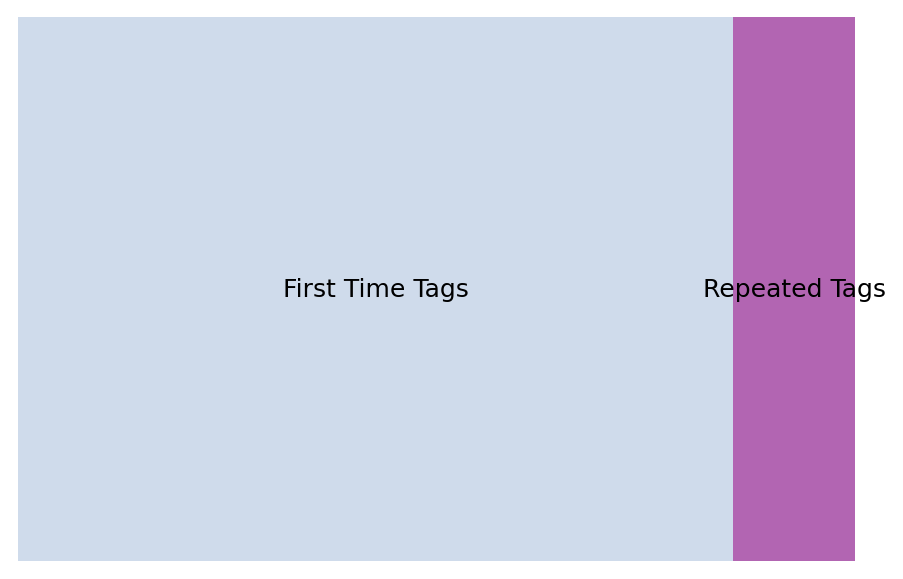

In [24]:
# checking the numerical distribution
values = [sum(np.array(counts['message']) == 1)/len(counts['message']), sum(np.array(counts['message']) != 1)/len(counts['message'])]
labels = ['First Time Tags', 'Repeated Tags']
colors = ['lightsteelblue', "purple"]

squarify.plot(sizes=values, label=labels,  color=colors, alpha=0.6)
plt.axis('off')
plt.show()

In [25]:
repeated_tags_rate = round(sum(np.array(counts['message']) > 1)*100/len(counts['message']), 1)
print(f"{repeated_tags_rate} percent of the data are from repeated tags")

14.6 percent of the data are from repeated tags


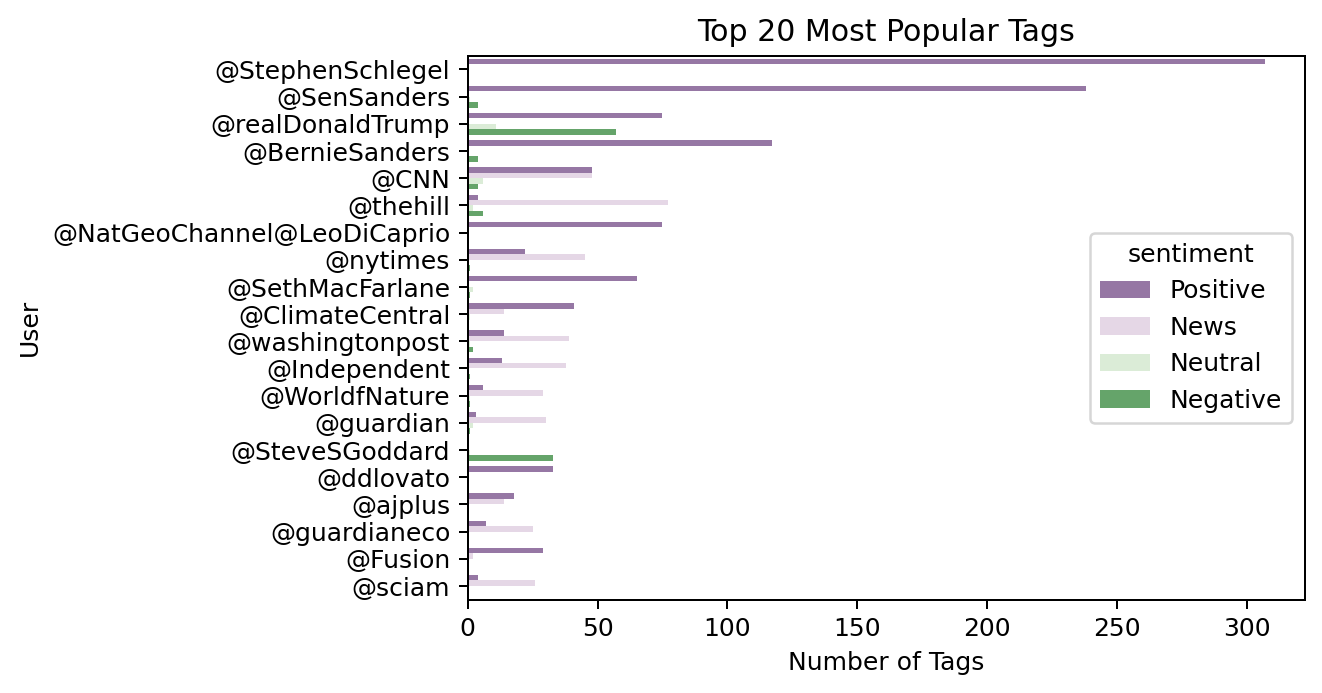

In [26]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", hue="sentiment", data=new_df, palette='PRGn',
              order=new_df.users.value_counts().iloc[:20].index) 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Most Popular Tags')
plt.show()
#plt.xticks(rotation=90)

Now that we've had a look at the tweets themselves as well as the users, we now analyse the hastags:

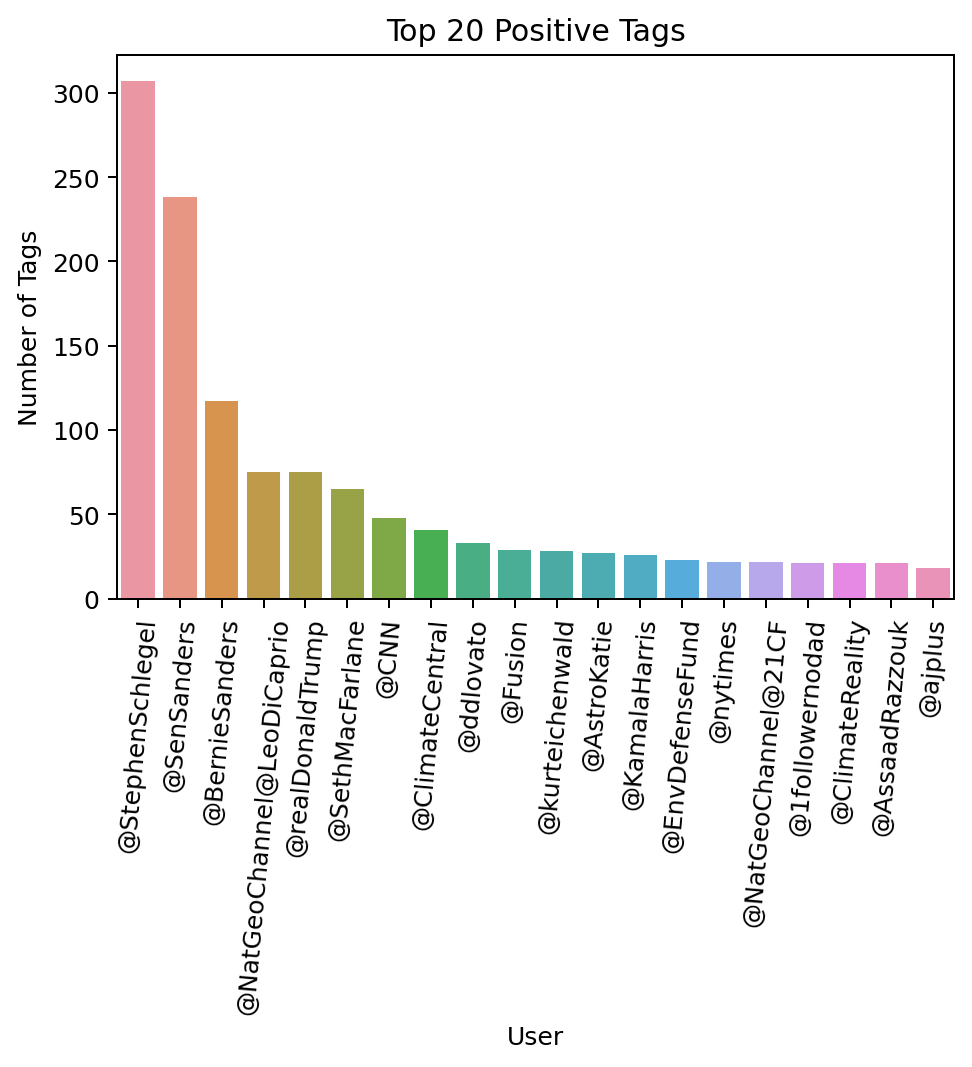

In [29]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(x="users", data=new_df[new_df['sentiment'] == 'Positive'],
              order=new_df[new_df['sentiment'] == 'Positive'].users.value_counts().iloc[:20].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 20 Positive Tags')
plt.xticks(rotation=85)
plt.show()


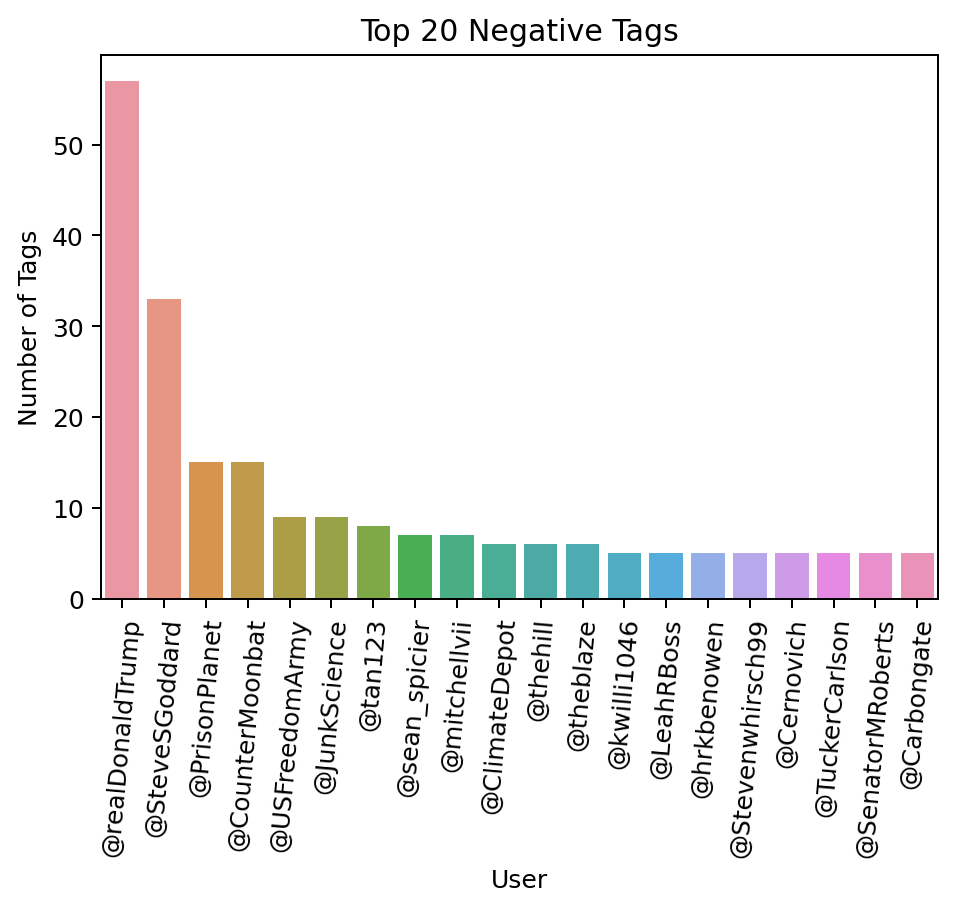

In [30]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(x="users", data=new_df[new_df['sentiment'] == 'Negative'],
              order=new_df[new_df['sentiment'] == 'Negative'].users.value_counts().iloc[:20].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 20 Negative Tags')
plt.xticks(rotation=85)
plt.show()


In [10]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(x="users", data=new_df[new_df['sentiment'] == 'News'],
              order=new_df[new_df['sentiment'] == 'News'].users.value_counts().iloc[:20].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 20 News Tags')
plt.xticks(rotation=85)
plt.show()


NameError: name 'new_df' is not defined